<div class="title">Practical Assignment: Dimensionality Reduction</div>
<div class="subtitle">Métodos Avanzados en Aprendizaje Automático</div>
<div class="author"> Marlon Rodríguez Flor</div>
<div class="date">17 Oct 2023</div>

---

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used (all of them quite standard).

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import KernelCenterer
import warnings
warnings.filterwarnings('ignore')


matplotlib.rc('figure', figsize=(15, 5))
seed = 123

# Introduction

This practical assignment consists in implementing a simplified version of the KernelPCA class of `sklearn`.

This class will contain three public methods: `fit()`, `transform()` and `fit_transform()`.

# Implementation of KPCA

## Requirements

The objective of this assignment is to complete the class `KPCA` sketched below, which should contain at least the following methods.

---
```python
__init__(self, n_components, kernel, gamma)
```
* This is the construction method for the class, with the following parameters:
    * `n_components`: Reduced dimension.
    * `kernel`: `'linear'` or `'rbf'`.
    * `gamma`: Kernel parameter $\gamma$ of the RBF kernel.
* This method should only store the parameters in fields of the class, to be used when needed.

---
```python
fit(self, X)
```
* This is the training method, with the following parameters:
    * `X`: Training data matrix $\mathbf{X}$. We assume it is centered.
* This method should compute the projecting direction, storing the useful information in fields of the class.

---
```python
transform(self, X)
```
* This is the method that computes the projection, with the following parameters:
    * `X`: New data matrix $\mathbf{X}$.
* This method will used the stored information in the class for projecting new points.
---
```python
fit_transform(self, X)
```
* This method firstly fit the model, and latter apply it over the training data, with the following parameters:
    * `X`: New data matrix $\mathbf{X}$.
* **NOTE**: This method can be implemented just calling the methods `fit` and `transform`; but also it can be computed more efficiently by theoretically computing the projection in this case. If this second approach is chosen, a brief explanation of why the implemented code is working will be required.

### Some recommendations:

* We will not pay attention to the dataset size, the examples used will be simple ones. We recommend the use of `eigs` from `scipy` that computes only the first `k` eigenvalues and eigenvectors. It will be necessary to ensure that the eigenvectors are ordered in terms of the largest eigenvalues.
* The projection direction should be deterministic, so the eigenvectors found should be flipped in terms of their sign to obtain always the same result.
* Projected data should be centered inside the method (so it has zero mean, but the std remains the same), being careful to also centered the projected new data points. For this purpose you can use the method [KernelCenterer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KernelCenterer.html) from sklearn.
* Remember that the projection direction should have norm 1. This means that during the training the computed eigenvectors should be properly normalized and stored once normalized.

## Implementation

<div class="qst">

* Complete the `KPCA` class below, satisfying the described requirements.

</div>

In [4]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from numpy.linalg import eig
from sklearn.utils import extmath


class KPCA():
    """
        Kernel PCA.
    """
    def __init__(self, n_components, kernel, gamma=None):
        # Assignment of the hyper-parameters (complete).
        self.n_components = n_components
        self.kernel = kernel
        self.gamma = gamma
        self.eigenVectors = None
        self.eigenValues = None
        self.X_org = None
        self.fittedKernel = KernelCenterer()


    def apply_kernel(self, X, Y):
        
        if Y is None:
            Y = X
        if self.kernel == 'linear':
            gram_matrix = X @ Y.T
        elif self.kernel == 'rbf':
            gram_matrix = rbf_kernel(X,Y, gamma=self.gamma)
        else:
            raise Exception("No existe el kernel. Kernel no definido")

        return gram_matrix


    def fit(self, X):
        # Computation of the projection direction (complete).
        # ...
        self.X_org = X
        gram_matrix = self.apply_kernel(X, Y = None)
        
        self.fittedKernel.fit(gram_matrix)

        k = self.fittedKernel.transform(gram_matrix)

        eigenValues, eigenVectors = eig(k)
        eigenVectors, _ = extmath.svd_flip(eigenVectors, np.empty_like(eigenVectors).T)

        idx = eigenValues.argsort()[::-1]   
        self.eigenVectors = eigenVectors[:,idx]
        self.eigenValues = eigenValues[idx]

        return self
    

    def transform(self, X):
        # Computation of the projected components (complete).
        gram_matrix = self.apply_kernel(X, Y = self.X_org)

        k = self.fittedKernel.transform(gram_matrix)

        proj = k @ np.divide(self.eigenVectors[:,np.arange(self.n_components)], np.sqrt(self.eigenValues[np.arange(self.n_components)]))

        return proj

    def fit_transform(self, X):

        self.fit(X)

        proj = np.multiply(self.eigenVectors[:,np.arange(self.n_components)], np.sqrt(self.eigenValues[np.arange(self.n_components)]))
        
        return proj


    def getEigenValues(self):
        return self.eigenValues[np.arange(self.n_components)]
    
    def getEigenVectors(self):
        return self.eigenVectors[:,np.arange(self.n_components)]



# Experiments with KPCA

## Comparative with *scikit-learn*

The following cell generates the *blobs* dataset and depicts it.

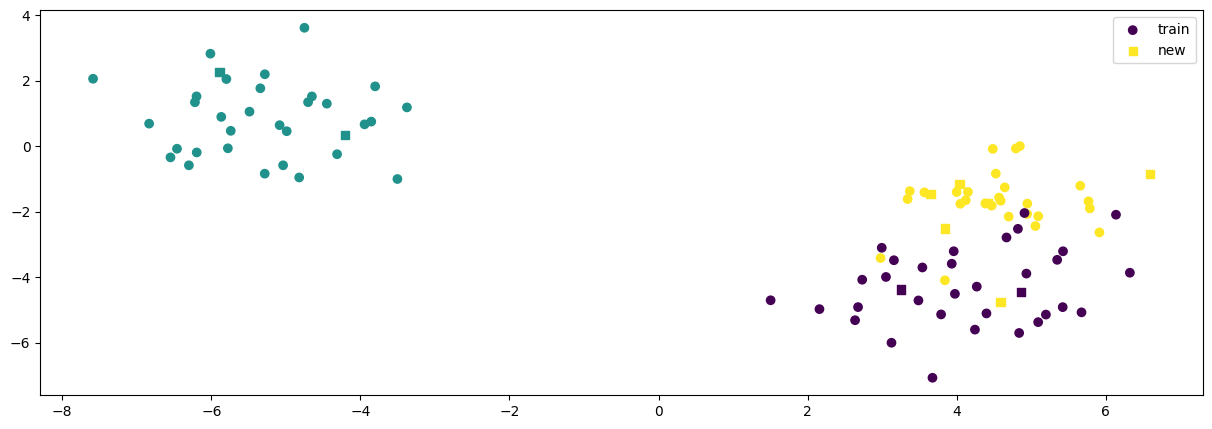

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=seed)
X_train = X[:90,:]; y_train=y[:90]
X_new = X[90:,:]; y_new=y[90:]

plt.scatter(X_train[:,0], X_train[:,1],c=y_train, label='train')
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, marker='s', label='new')
plt.legend()
plt.show()

<div class="qst">

* Train and transform a classical PCA model over the training data (`X_train`), using both the implemented `KPCA` class using a linear kernel and the `PCA` class of `sklearn`.
* Transform using the previous two models the new data (`X_new`).
* Compare that both classes provide the same outputs (in terms of the eigenvectors and the data projections), describing the obtained results.
</div>

In [6]:
from sklearn.decomposition import PCA

kernel = 'linear'
n_components=2

model_my = KPCA(n_components=n_components, kernel=kernel)
model_sk = PCA(n_components=n_components)

# Training of the models (complete).
model_my.fit(X_train)
model_sk.fit(X_train)

# Comparative of the eigenvectors (complete).
# Comparative of the projections (complete).
model_my_proj = model_my.transform(X_new)
model_sk_proj = model_sk.transform(X_new)

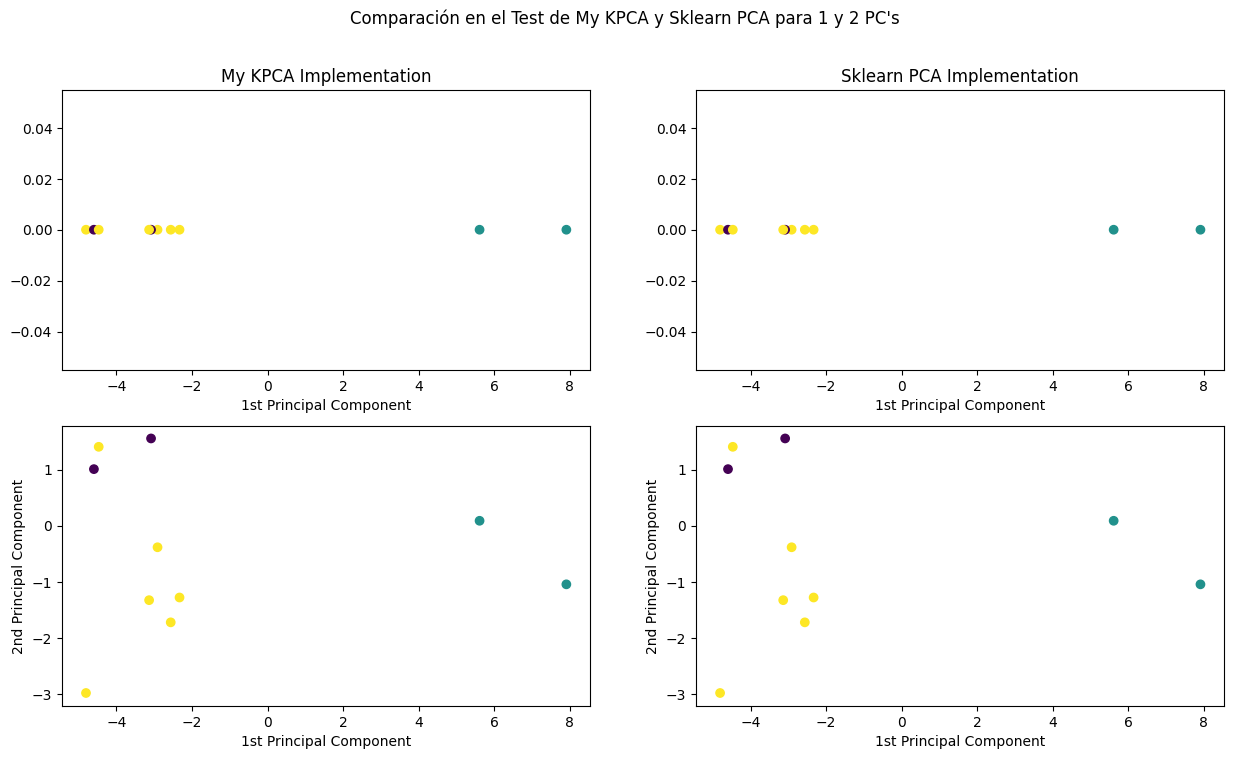

In [7]:
ncol = 2
nrow = 2
fig, axs = plt.subplots(nrow, ncol)
n_plots = 0
fig.suptitle("Comparación en el Test de My KPCA y Sklearn PCA para 1 y 2 PC's")


axs[0, 0].scatter(model_my_proj[:,0], [0]*len(model_my_proj[:,0]),c = y_new, label = 'New Data')
axs[0, 0].set_title('My KPCA Implementation')
axs[0, 0].set(xlabel='1st Principal Component')

axs[0, 1].scatter(model_sk_proj[:,0], [0]*len(model_sk_proj[:,0]),c = y_new, label = 'New Data')
axs[0, 1].set_title('Sklearn PCA Implementation')
axs[0, 1].set(xlabel='1st Principal Component')

axs[1, 0].scatter(model_my_proj[:,0], model_my_proj[:,1],c = y_new, label = 'New Data')
# axs[1, 0].set_title('My KPCA Implementation')
axs[1, 0].set(xlabel='1st Principal Component',  ylabel='2nd Principal Component')

axs[1, 1].scatter(model_sk_proj[:,0], model_sk_proj[:,1],c = y_new, label = 'New Data')
# axs[1, 1].set_title('Sklearn PCA Implementation')
axs[1, 1].set(xlabel='1st Principal Component',  ylabel='2nd Principal Component')

fig.set_size_inches(15, 8)

#### Comparación Proyecciones

- Se puede apreciar que las gráficas anteriores son identicas, los datos se distribuyen de la misma manera en todos los casos. Esto se debe a que un Kernel PCA con un kernel lineal es equivalente a realizar un PCA.

#### Comparación EigenVectores

- En cuanto a los EigenVectores obtenidos en cada uno de los algoritmos se aprecian diferencias. La diferencia entre cada algoritmo se encuentra en la construcción de la matriz de Covarianza en el caso de PCA (X.T @ X) y la matriz Gram (X @ X.T) en el caso de KPCA, por esta razón existe una diferencia en las dimensiones de los EigenVectores ya que parten de una matriz de Covarianza o Gram distintas. 

In [8]:
print("Dimensiones CPs KPCA:", model_my.getEigenVectors().shape)
print("Dimensiones CPs PCA:", model_sk.components_.shape)

Dimensiones CPs KPCA: (90, 2)
Dimensiones CPs PCA: (2, 2)


<div class="qst">

* Train and transform a Kernel PCA model using a RBF kernel over the training data (`X_train`), calling both the implemented `KPCA` class and the `KernelPCA` class of `sklearn`.
* Transform using the previous two models the new data (`X_new`).
* Compare that both classes provide the same outputs (in terms of the eigenvectors and the data projections), describing the obtained results.
</div>

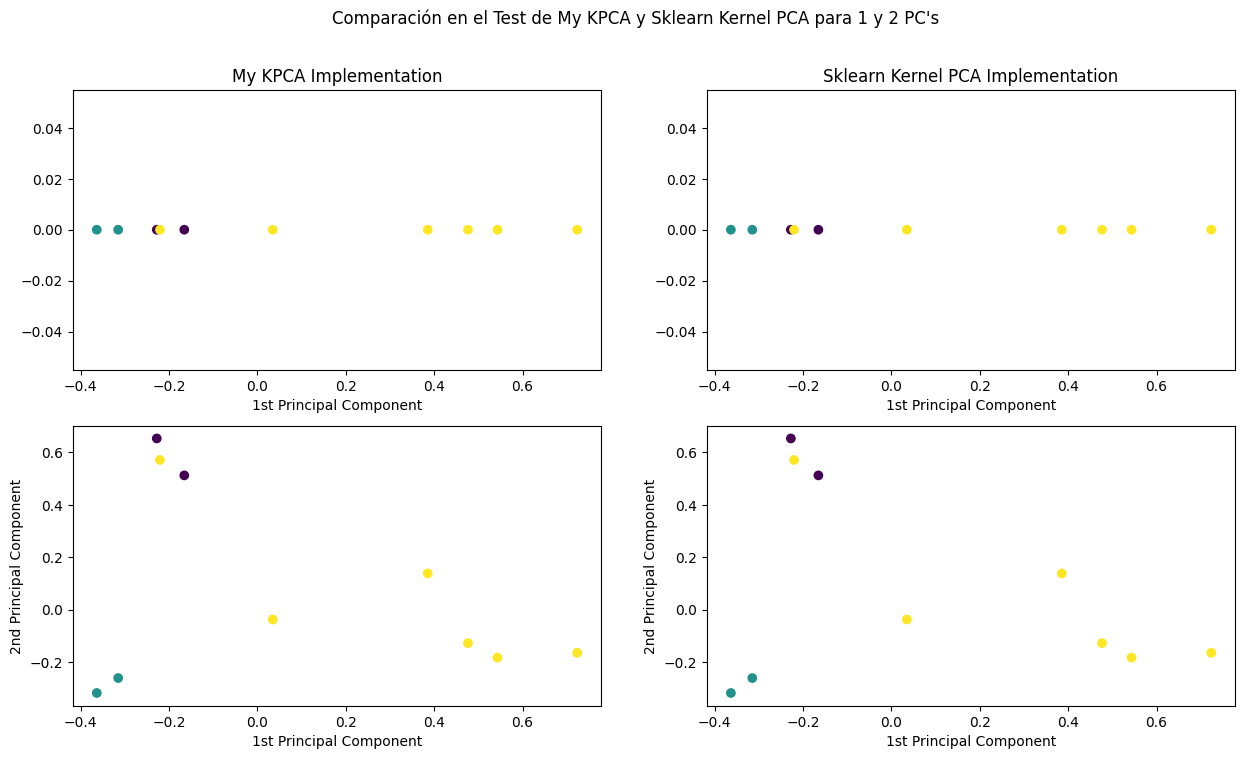

In [9]:
from sklearn.decomposition import KernelPCA

kernel = 'rbf'
n_components=2

# Model definition (complete).
model_my = KPCA(n_components=n_components, kernel=kernel)
model_sk = KernelPCA(n_components=n_components, kernel=kernel)

# Training of the models (complete).
model_my.fit(X_train)
model_sk.fit(X_train)

# Comparative of the eigenvectors (complete).
# Comparative of the projections (complete).
model_my_proj = model_my.transform(X_new)
model_sk_proj = model_sk.transform(X_new)


ncol = 2
nrow = 2
fig, axs = plt.subplots(nrow, ncol)
n_plots = 0
fig.suptitle("Comparación en el Test de My KPCA y Sklearn Kernel PCA para 1 y 2 PC's")


axs[0, 0].scatter(model_my_proj[:,0], [0]*len(model_my_proj[:,0]),c = y_new, label = 'New Data')
axs[0, 0].set_title('My KPCA Implementation')
axs[0, 0].set(xlabel='1st Principal Component')

axs[0, 1].scatter(model_sk_proj[:,0], [0]*len(model_sk_proj[:,0]),c = y_new, label = 'New Data')
axs[0, 1].set_title('Sklearn Kernel PCA Implementation')
axs[0, 1].set(xlabel='1st Principal Component')

axs[1, 0].scatter(model_my_proj[:,0], model_my_proj[:,1],c = y_new, label = 'New Data')
axs[1, 0].set(xlabel='1st Principal Component',  ylabel='2nd Principal Component')

axs[1, 1].scatter(model_sk_proj[:,0], model_sk_proj[:,1],c = y_new, label = 'New Data')
axs[1, 1].set(xlabel='1st Principal Component',  ylabel='2nd Principal Component')

fig.set_size_inches(15, 8)

In [10]:
print("Dimensiones CPs KPCA:", model_my.getEigenVectors().shape)
print("Dimensiones CPs KernelPCA:", model_sk.eigenvectors_.shape)


if np.all(np.array(model_my.getEigenVectors() - model_sk.eigenvectors_ < 0.00001)):
    print('Los Eigenvectores son iguales')
else:
    print('Los Eigenvectores NO son iguales')



Dimensiones CPs KPCA: (90, 2)
Dimensiones CPs KernelPCA: (90, 2)
Los Eigenvectores son iguales


#### Comparación Proyecciones
- Se aprecia que en ambos casos obtenemos la misma proyección y distribución de los puntos en ambas componentes principales. Además, los ejes de las componentes principales son los mismos. En conclusión, no se aprecia ninguna diferencia entre la implementación de Sklearn y la implementación My PCA.

#### Comparación Componentes principales

- Ambos Eigenvectores tienen la misma dimensión y tienen los mismos valores. No existe diferencia entre la implementación de Sklearn y My KPCA.

## Comparing linear kernel against Gaussian kernel

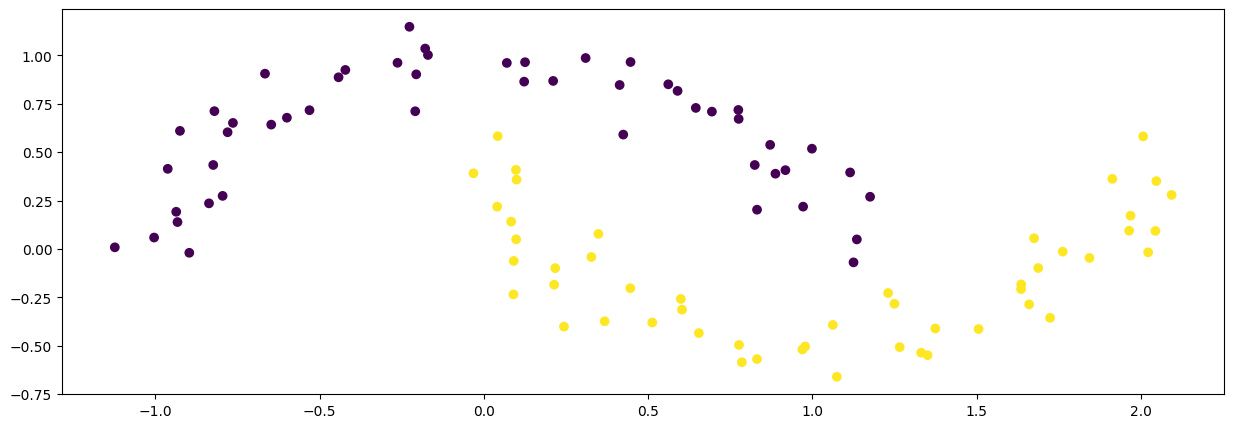

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=1e-1, random_state=seed)

plt.scatter(X[:,0], X[:,1],c=y)

<div class="qst">

* Using the implemented class `KPCA` compare the result of transforming the above dataset using a linear kernel and an RBF one (looking for an appropriated hyperparameter `gamma` value).
* Is there some model able to properly project the classes separately?
</div>

In [12]:
n_components=2

model_linear = KPCA(n_components=n_components, kernel='linear')
model_rbf = KPCA(n_components=n_components, kernel='rbf', gamma=10)

# Training of the models (complete).
model_linear = model_linear.fit_transform(X)
model_rbf = model_rbf.fit_transform(X)


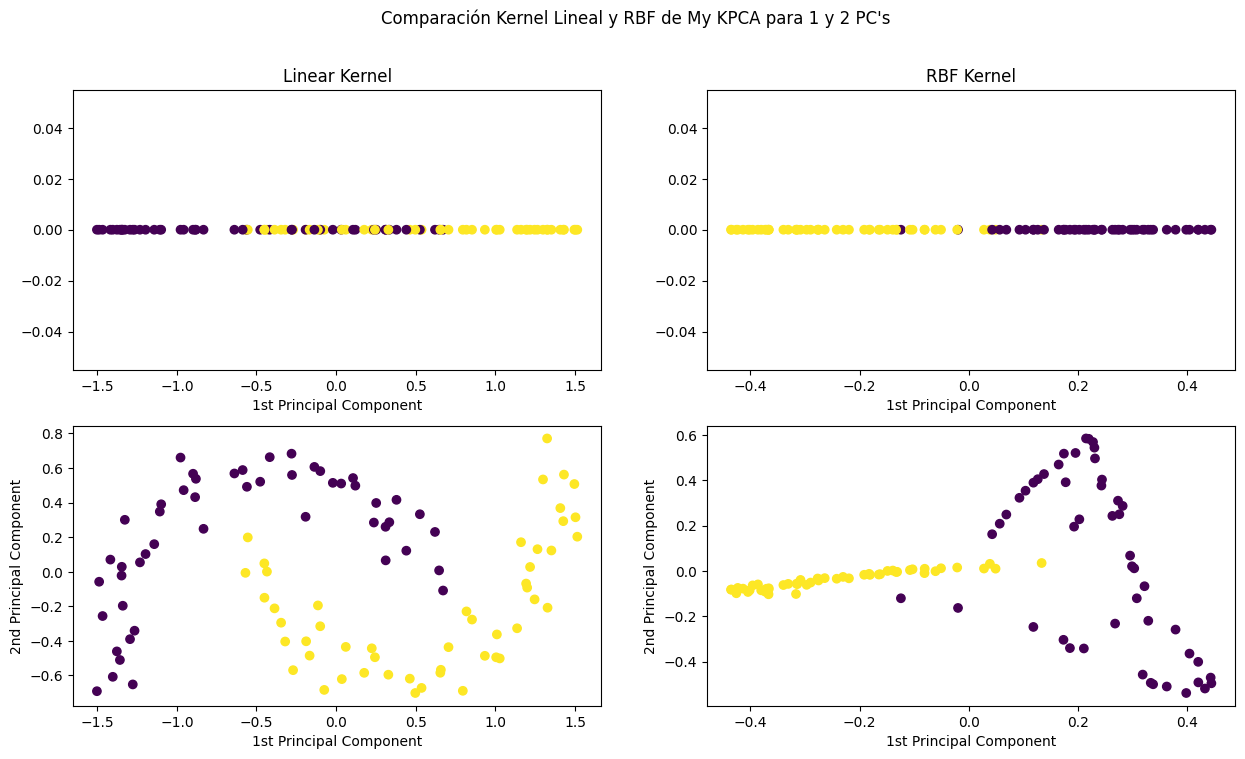

In [13]:
ncol = 2
nrow = 2
fig, axs = plt.subplots(nrow, ncol)
n_plots = 0
fig.suptitle("Comparación Kernel Lineal y RBF de My KPCA para 1 y 2 PC's")


axs[0, 0].scatter(model_linear[:,0], [0]*len(model_linear[:,0]), c=y)
axs[0, 0].set_title('Linear Kernel')
axs[0, 0].set(xlabel='1st Principal Component')

axs[0, 1].scatter(model_rbf[:,0], [0]*len(model_rbf[:,0]), c=y)
axs[0, 1].set_title('RBF Kernel')
axs[0, 1].set(xlabel='1st Principal Component')

axs[1, 0].scatter(model_linear[:,0], model_linear[:,1], c=y)
# axs[1, 0].set_title('My KPCA Implementation')
axs[1, 0].set(xlabel='1st Principal Component',  ylabel='2nd Principal Component')

axs[1, 1].scatter(model_rbf[:,0], model_rbf[:,1], c=y)
# axs[1, 1].set_title('Sklearn PCA Implementation')
axs[1, 1].set(xlabel='1st Principal Component',  ylabel='2nd Principal Component')

fig.set_size_inches(15, 8)

#### Comparación Kernel Lineal y RBF
- Utilizar un KPCA con kernel lineal es equivalente a realizar un PCA y como se puede observar en la gráfica claramente se puede apreciar que los datos no son separables linealmente, por lo que no es conveniente usar un kernel lineal.
- Evidentemente, debemos utilizar algún kernel que permita transformar los datos y así tratar de dividir las clases. Como se puede observar en las figuras anteriores el Kernel PCA con un Kernel RBF o Gausiano hace un mejor trabajo proyectando los datos de manera que las clases puedan ser separadas con mayor facilidad.